IMPORTING NECESSARY LIBRARIES

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

DATA PREPROCESSING

In [43]:
df = pd.read_csv("weather.csv")

In [44]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [45]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [46]:
df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [47]:
df.shape

(366, 22)

In [48]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [50]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

DATA CLEANING / IMPUTING VALUES

In [51]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [52]:
df.fillna(method='ffill', inplace=True)

In [53]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [54]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

EDA - EXPLORATORY DATA ANALYSIS

<Axes: xlabel='RainTomorrow', ylabel='count'>

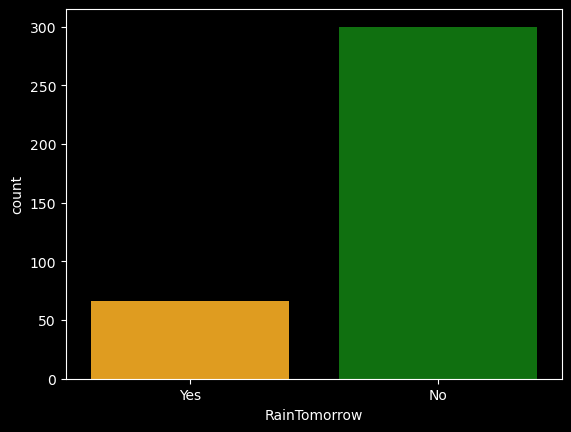

In [55]:
plt.style.use('dark_background')
sns.countplot(x='RainTomorrow',data=df, palette=['orange', 'green'])

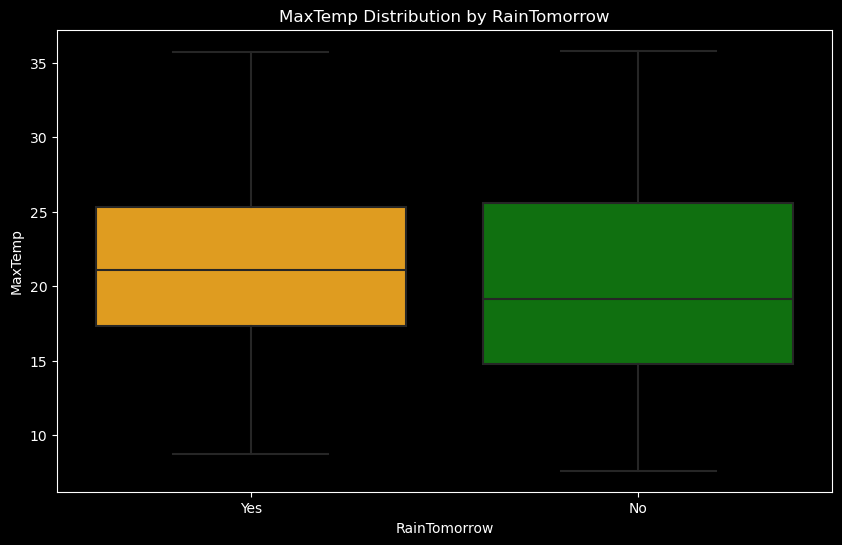

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df, palette=['orange', 'green'])
plt.title('MaxTemp Distribution by RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('MaxTemp')
plt.show()

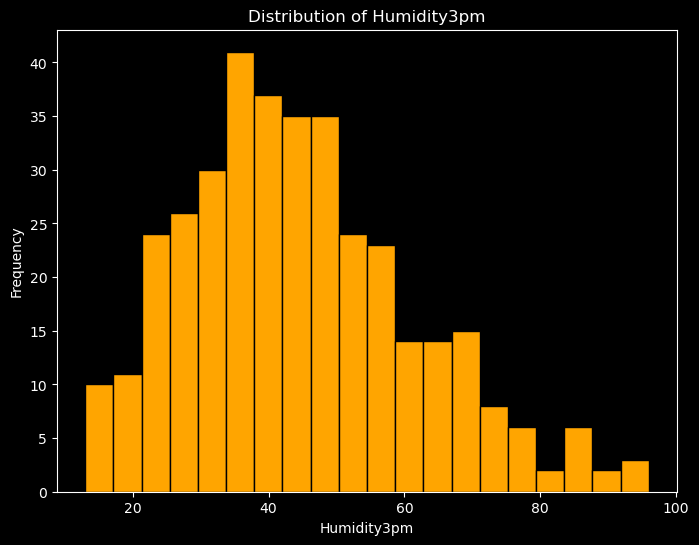

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.hist(df['Humidity3pm'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Frequency')
plt.show()

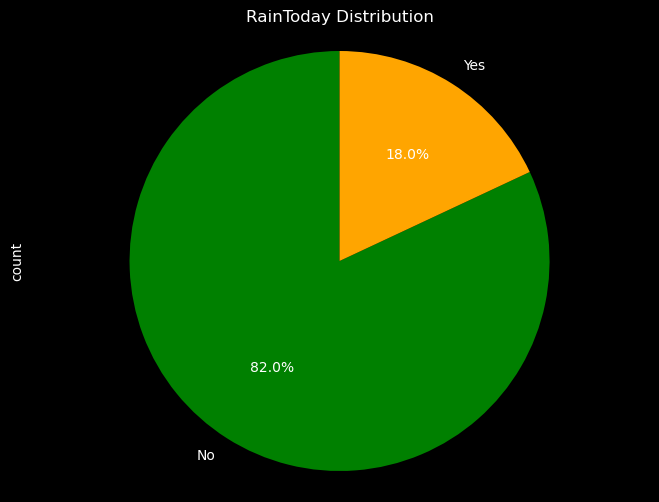

In [58]:
plt.style.use('dark_background')
custom_colors = ['green', 'orange']
plt.figure(figsize=(8, 6))
df['RainToday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('RainToday Distribution')
plt.axis('equal')
plt.show()

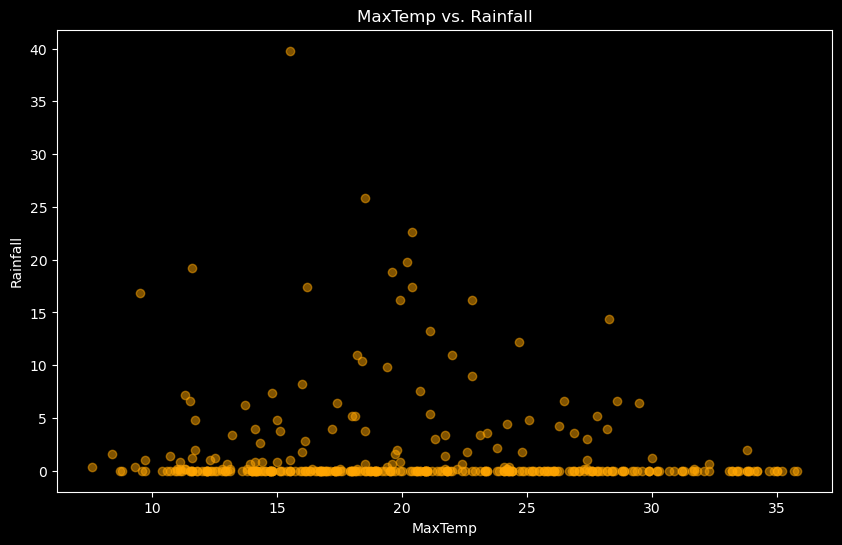

In [59]:
plt.style.use('dark_background')
plot_color = 'orange'
plt.figure(figsize=(10, 6))
plt.scatter(df['MaxTemp'], df['Rainfall'], alpha=0.5, color=plot_color)
plt.title('MaxTemp vs. Rainfall')
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.show()

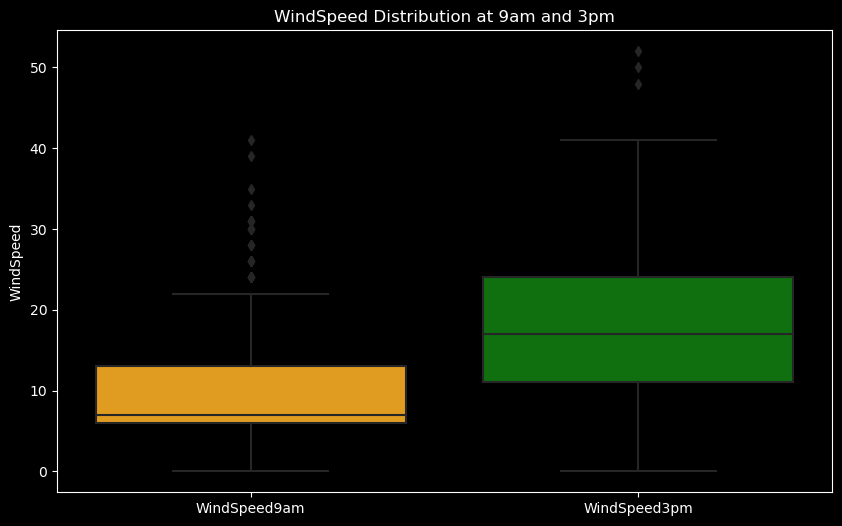

In [60]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['WindSpeed9am', 'WindSpeed3pm']], palette=['orange', 'green'])
plt.title('WindSpeed Distribution at 9am and 3pm')
plt.ylabel('WindSpeed')
plt.show()

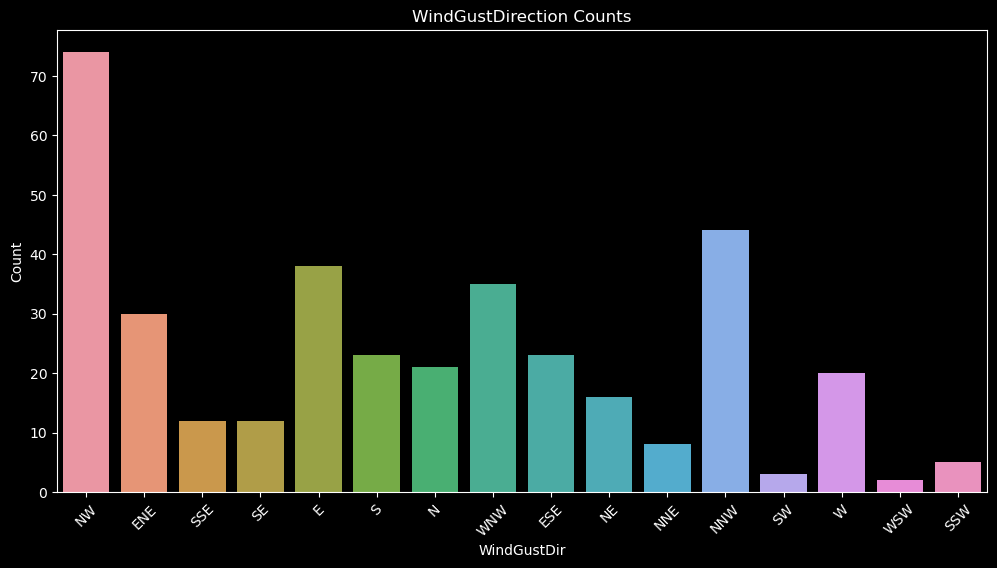

In [61]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.countplot(x='WindGustDir', data=df)
plt.title('WindGustDirection Counts')
plt.xlabel('WindGustDir')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

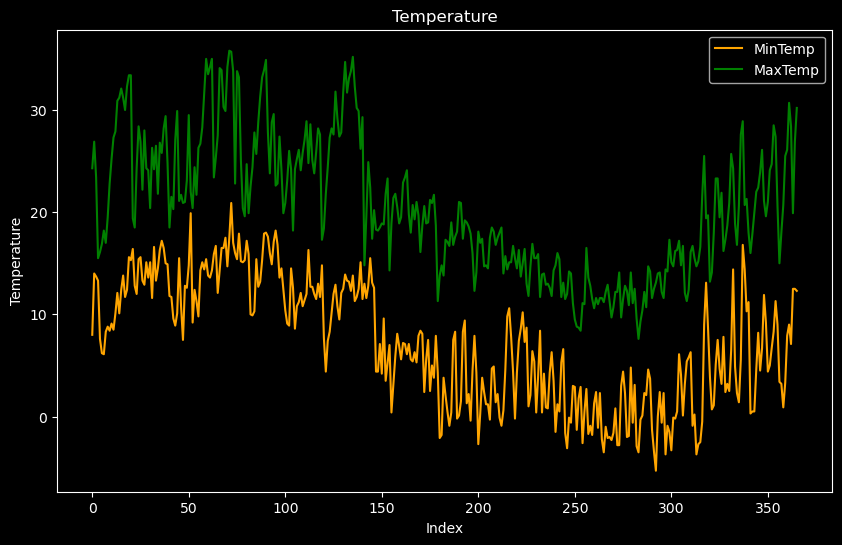

In [62]:
plt.style.use('dark_background')
min_temp_color = 'orange'  
max_temp_color = 'green'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MinTemp'], label='MinTemp', color=min_temp_color)
plt.plot(df.index, df['MaxTemp'], label='MaxTemp', color=max_temp_color)
plt.title('Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()

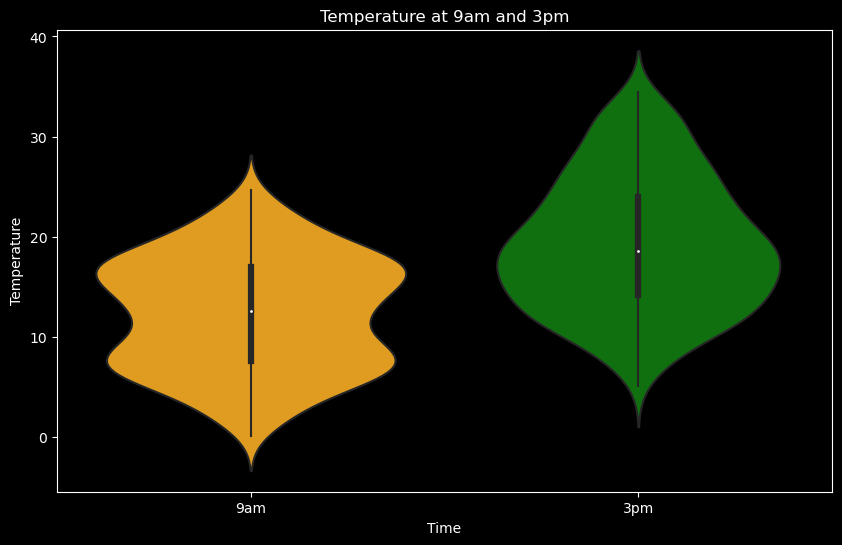

In [63]:
plt.style.use('dark_background')
custom_palette = ['orange', 'green']
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Temp9am', 'Temp3pm']], palette=custom_palette)
plt.title('Temperature at 9am and 3pm')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.xticks(ticks=[0, 1], labels=['9am', '3pm'])
plt.show()

SPLITTING DATASET INTO TRAINING AND TESTING DATA

In [64]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [65]:
cat_cols =['WindGustDir','WindDir9am','WindDir3pm', 'RainToday']
encoder = OneHotEncoder(drop='first',sparse= False)
encoded_cols =pd.DataFrame(encoder.fit_transform(df[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))

In [66]:
x= pd.concat([encoded_cols],axis=1) 

y=df['RainTomorrow']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LOGISTIC REGRESSION

In [68]:
log = LogisticRegression()

In [69]:
log.fit(x_train, y_train)

LogisticRegression()

In [70]:
log.score(x_train, y_train)

0.8493150684931506

In [71]:
log.score(x_test, y_test)

0.7837837837837838

In [72]:
y_pred = log.predict(x_test)

In [73]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7837837837837838


In [74]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.78      1.00      0.88        58
         Yes       0.00      0.00      0.00        16

    accuracy                           0.78        74
   macro avg       0.39      0.50      0.44        74
weighted avg       0.61      0.78      0.69        74



In [75]:
print(metrics.confusion_matrix(y_test, y_pred))

[[58  0]
 [16  0]]


In [76]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=['pred0','pred1'],
                     index= ['act0','act1'])

In [77]:
cnfTrain

,pred0,pred1
act0,58,0
act1,16,0


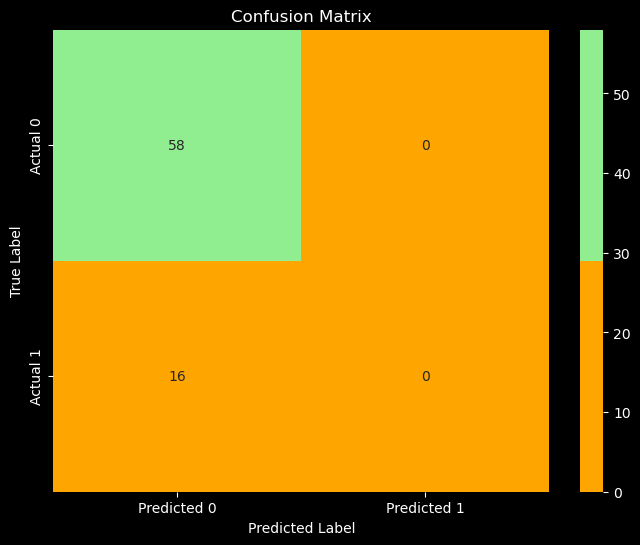

In [78]:
from sklearn.metrics import confusion_matrix

y_pred = log.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
colors = ['orange', 'lightgreen']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

MODEL TUNNING

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    'penalty':['l1' ,'l2'],
    'C': [0.1, 0.5, 1,5, 10]}

In [80]:
grid_search=GridSearchCV(estimator=log, param_grid=param_grid, cv=5)

In [81]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [82]:
best_param =grid_search.best_params_
best_model=grid_search.best_estimator_

In [83]:
y_pred =best_model.predict(x_test)


In [84]:
acc = metrics.accuracy_score(y_test,y_pred)
print('Acc:',acc)

Acc: 0.7837837837837838


CROSS VALIDATION

In [85]:
from sklearn.model_selection import cross_val_score

log_cv = LogisticRegression()

cv_scores = cross_val_score(log_cv, x_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.81355932 0.81355932 0.86206897 0.81034483 0.82758621]
Mean CV Score: 0.8254237288135593


SUPPORT VECTOR MACHINE 

In [86]:
from sklearn.svm import SVC
svcm = SVC(kernel='linear')

In [87]:
svcm.fit(x_train, y_train)

SVC(kernel='linear')

In [88]:
y_pred = svcm.predict(x_test)

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.7837837837837838

In [90]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.78      1.00      0.88        58
         Yes       0.00      0.00      0.00        16

    accuracy                           0.78        74
   macro avg       0.39      0.50      0.44        74
weighted avg       0.61      0.78      0.69        74



In [91]:
metrics.confusion_matrix(y_test, y_pred)

array([[58,  0],
       [16,  0]], dtype=int64)

NAIVE BAYES

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb_model = GaussianNB()

In [94]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [95]:
y_pred = nb_model.predict(x_test)

In [96]:
metrics.accuracy_score(y_test, y_pred)

0.32432432432432434

In [97]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.79      0.19      0.31        58
         Yes       0.22      0.81      0.34        16

    accuracy                           0.32        74
   macro avg       0.50      0.50      0.32        74
weighted avg       0.66      0.32      0.31        74



In [98]:
metrics.confusion_matrix(y_test, y_pred)

array([[11, 47],
       [ 3, 13]], dtype=int64)

EVALUATION METRICS

In [117]:
y_prob = best_model.predict_proba(x_test)

y_pred = (y_prob[:, 1] > 0.5).astype(int)

In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_pred_encoded = le.transform(y_pred)

r2 = r2_score(y_test_encoded, y_pred_encoded)
print("R-squared Score:", r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-squared Score: -0.2758620689655171
Mean Absolute Error: 0.21621621621621623
Mean Squared Error: 0.21621621621621623
Root Mean Squared Error: 0.46499055497527714


In [112]:
from sklearn.metrics import roc_auc_score

y_prob = best_model.predict_proba(x_test)[:, 1]

roc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", roc_score)


ROC AUC Score: 0.5495689655172414


In [113]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

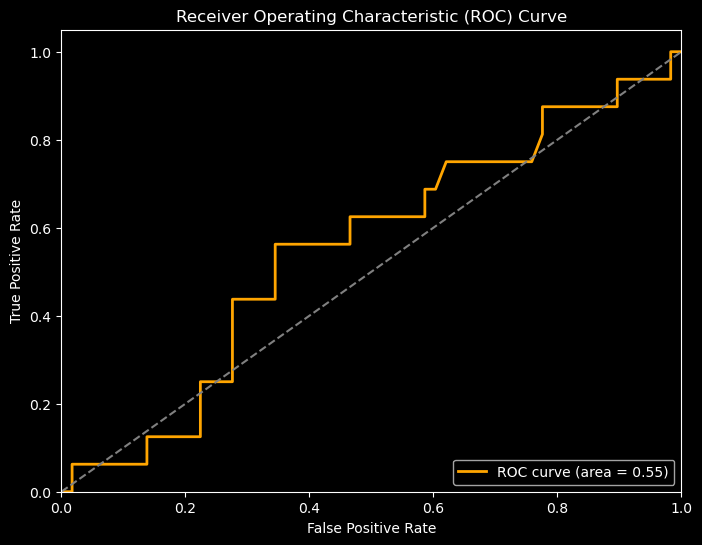

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_positive = y_prob 

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

roc_auc = roc_auc_score(y_test, y_prob_positive)

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



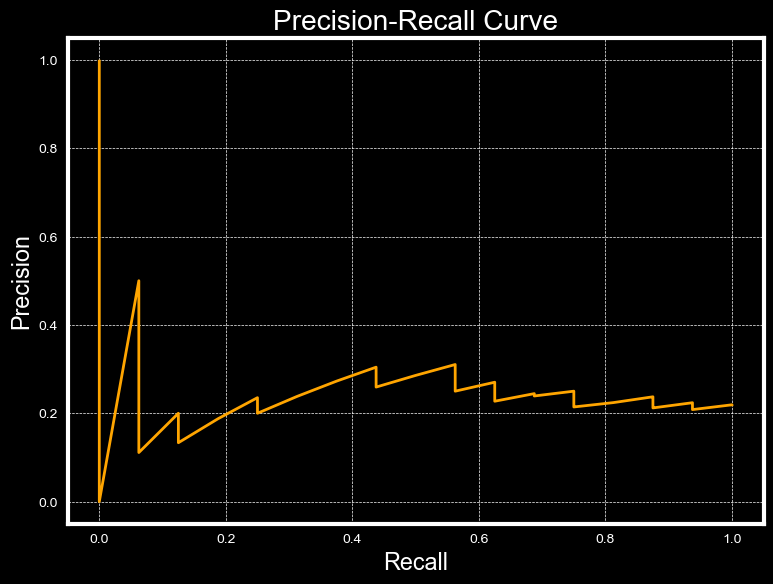

In [397]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='orange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
